In [1]:
import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm
  
df = pd.read_csv('NLP_PROJECT.csv')
df.tail()

,English,Urdu
99995,'Jackass generation' pupils condemned over fir...,'جیکاس نسل' کے طلباء نے فائر اسٹنٹ پر مذمت کی
99996,One of the most extreme examples of religious ...,ہم جنس پرست لوگوں پر ظلم و ستم کی حمایت کرنے و...
99997,The miner also recorded half-yearly production...,کان کنی نے پیٹرولیم ، نکل اور زنک میں پیداوار ...
99998,And it happens every year.,اور یہ ہر سال ہوتا ہے۔
99999,"That is the current situation, however.",تاہم ، موجودہ صورتحال یہی ہے۔


In [2]:
df.describe()

,English,Urdu
count,99999,100000
unique,90796,90759
top,#NAME?,مکمل طور پر ۔
freq,91,12


In [3]:
df['English_sentence']=df['English']
df['Urdu_sentence']=df['Urdu']

In [4]:
df.drop(columns=['Urdu'],inplace=True)
df.drop(columns=['English'],inplace=True)

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test1, y_train, y_test1 = train_test_split(df['Urdu_sentence'], df['English_sentence'], test_size=0.3)

In [6]:
y_train.describe()

count      69999
unique     65447
top       #NAME?
freq          57
Name: English_sentence, dtype: object

In [7]:
x_val, x_test, y_val, y_test = train_test_split(x_test1,  y_test1, test_size=0.5)

In [8]:
x_val.describe()

count                             15000
unique                            14793
top       آسمان سے گرا کھجور میں اٹکا ۔
freq                                  4
Name: Urdu_sentence, dtype: object

In [9]:
x_test.describe()

count        15000
unique       14757
top       شیطان  ۔
freq             4
Name: Urdu_sentence, dtype: object

In [10]:
def dataprepro(x,y):
    df1=pd.DataFrame(x)
    df2=pd.DataFrame(y)
    df3=pd.concat([df1, df2], axis=1)
    return df3

In [11]:
training_data=dataprepro(x_train,y_train)
Val_data=dataprepro(x_val,y_val)
Testing_data=dataprepro(x_val,y_val)

In [12]:
training_data.describe()

,Urdu_sentence,English_sentence
count,70000,69999
unique,65400,65447
top,جب تک سانس تب تک آس ۔,#NAME?
freq,10,57


In [13]:
Val_data.describe()

,Urdu_sentence,English_sentence
count,15000,15000
unique,14793,14792
top,آسمان سے گرا کھجور میں اٹکا ۔,#NAME?
freq,4,22


In [14]:
Testing_data.describe()

,Urdu_sentence,English_sentence
count,15000,15000
unique,14793,14792
top,آسمان سے گرا کھجور میں اٹکا ۔,#NAME?
freq,4,22


In [15]:

def cleanerEng(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'[^a-z0-9]+',' ',x)
  if len(x) > 150:
    x = x[:150]
  return x

def cleanerurdu(x):
  x = str(x)
  x = re.sub(r'[-.।|,?;:<>&$₹]+',' ',x)
  if len(x) > 150:
    x = x[:150]
  return x
  

In [16]:
Val_data.iloc[:,0] = Val_data['Urdu_sentence'].apply(func=cleanerurdu)
Val_data.iloc[:,1] = Val_data['English_sentence'].apply(func= cleanerEng)
Val_data.iloc[:,0] = Val_data['Urdu_sentence'].apply(func= lambda x : (str(x).split()))
Val_data.iloc[:,1] = Val_data['English_sentence'].apply(func= lambda x : (str(x).split()))

In [17]:
Val_data.head()

,Urdu_sentence,English_sentence
87312,"[اس, کے, آخری, ٹیکسٹ, میسجز, اثر, سے, 22, سیکن...","[the, last, of, his, text, messages, went, out..."
74872,"[کھیلوں, کی, بھر, مار, بھی, ہے]","[there, is, also, a, lot, of, sports]"
16663,"[لہذا, خصوصی, احتیاطی, اور, حفاظتی, اقدامات, ک...","[specific, preventive, and, protective, measur..."
52267,"[نہ, خود, خوش, ہونا, نا, ہونے, دینا, ۔]","[dog, in, the, manger]"
85823,"[چھ, مہینوں, کے, ل, political, ،, آپ, کو, اپنی...","[for, six, months, you, must, forget, your, ow..."


In [18]:
def addTokens(x,start=False):
  x.append('<END>')
  if start:
    x.insert(0,'<START>')
  return list(x)

In [19]:
Val_data.iloc[:,0] = Val_data['Urdu_sentence'].apply(func= addTokens,start=False)
Val_data.iloc[:,1] = Val_data['English_sentence'].apply(func= addTokens,start=True)

In [20]:
Val_data.iloc[:,0]

87312    [اس, کے, آخری, ٹیکسٹ, میسجز, اثر, سے, 22, سیکن...
74872               [کھیلوں, کی, بھر, مار, بھی, ہے, <END>]
16663    [لہذا, خصوصی, احتیاطی, اور, حفاظتی, اقدامات, ک...
52267       [نہ, خود, خوش, ہونا, نا, ہونے, دینا, ۔, <END>]
85823    [چھ, مہینوں, کے, ل, political, ،, آپ, کو, اپنی...
                               ...                        
94203    [آپ, کو, کس, نے, کہہ, دیا, کہ, فقہاء, تنگ, نظر...
41050    [تاہم, ،, یہ, خود, میں, ٹریڈنگ, نہیں, ہے, جو, ...
23827    [ہمارے, پاس, ان, تجاویز, کو, غیر, روایتی, اور,...
86186    [فی, الحال, اگر, کسی, کو, کتاب, مل, جاتی, ہے, ...
96510    [دیگر, سرگرمیوں, کے, لئے, کمیشن, نے, قبول, کیا...
Name: Urdu_sentence, Length: 15000, dtype: object

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import random

In [22]:
data = Val_data.values

In [23]:
data[:,1].shape

(15000,)

In [24]:
class vocab:

  def __init__(self,data,token=True):
    self.data = data
    if token:
      self.word2idx = {'<START>':1, '<END>':2, '<PAD>':0}
      self.idx2word = {1:'<START>', 2:'<END>', 0:'<PAD>'}
      self.idx = 2

    else:
      self.word2idx = {'<PAD>':0, '<END>':1}
      self.idx2word = {0:'<PAD>', 1:'<END>'}
      self.idx = 1

    self.x = []
    self.create()
    self.vocab_size = self.idx + 1

  def create(self):
    max_len = 0;
    for sentence in  self.data:
      max_len = max(max_len, len(sentence))
      for word in sentence:
        if self.word2idx.get(word) is None:
          self.idx += 1
          self.word2idx[word] = self.idx
          self.idx2word[self.idx] = word
    
    for sentence in self.data:
      sent = []
      for word in sentence:
        sent.append(self.word2idx[word])
      
      for i in range(len(sentence),max_len+1):
        sent.append(0)
      
      self.x.append(torch.Tensor(sent))

    

In [25]:
data[:,0]

array([list(['اس', 'کے', 'آخری', 'ٹیکسٹ', 'میسجز', 'اثر', 'سے', '22', 'سیکنڈ', 'پہلے', 'ہی', 'نکل', 'گئے', 'تھے۔', '<END>']),
       list(['کھیلوں', 'کی', 'بھر', 'مار', 'بھی', 'ہے', '<END>']),
       list(['لہذا', 'خصوصی', 'احتیاطی', 'اور', 'حفاظتی', 'اقدامات', 'کرنے', 'چاہ', 'تاکہ', 'پیویسی', 'میں', 'کارکنوں', 'کی', 'نمائش', 'کو', 'کم', 'کیا', 'جاسکے۔', '<END>']),
       ...,
       list(['ہمارے', 'پاس', 'ان', 'تجاویز', 'کو', 'غیر', 'روایتی', 'اور', 'جرات', 'مندانہ', 'بنانے', 'کی', 'کوئی', 'گنجائش', 'نہیں', 'ہے۔', '<END>']),
       list(['فی', 'الحال', 'اگر', 'کسی', 'کو', 'کتاب', 'مل', 'جاتی', 'ہے', 'تو', 'مجھے', 'امید', 'ہے', 'کہ', 'وہ', 'کہے', 'گا', 'واہ', '،', 'میں', 'واقعی', 'خوش', 'ہوں۔', '<END>']),
       list(['دیگر', 'سرگرمیوں', 'کے', 'لئے', 'کمیشن', 'نے', 'قبول', 'کیا', 'کہ', 'نقل', 'و', 'حمل', 'کی', 'امداد', 'ہوسکتی', 'ہے۔', '<END>'])],
      dtype=object)

In [26]:
Urdu_vocab = vocab(data[:,0],token=False)
English_vocab = vocab(data[:,1],token=True)

In [27]:
Urdu_vocab

In [28]:
for idx in Urdu_vocab.x[3]:  ###
  print(Urdu_vocab.idx2word[int(idx)],end=' ')

نہ خود خوش ہونا نا ہونے دینا ۔ <END> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

In [29]:
class parallelData(Dataset):

  def __init__(self):
    self.x = Urdu_vocab.x
    self.y = English_vocab.x

  def __getitem__(self,i):
    return self.x[i], self.y[i]
  
  def __len__(self):
    return len(self.x)


In [30]:
dataset = parallelData()

In [31]:
dataset[0][0]

tensor([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [32]:
a = dataset[0][0].shape[0]
b = dataset[0][1].shape[0]
for i in range(len(dataset)):
  if a != dataset[i][0].shape[0] or b != dataset[i][1].shape[0]:
    print(a,dataset[i][0].shape[0],b,dataset[i][1].shape[0])

In [33]:
Urdu_vocab.x[40].shape

torch.Size([42])

In [34]:
torch.cuda.device_count()

1

Model Prepration

In [35]:


class encoder(nn.Module):

  def __init__(self, input_size, embedding_size, hidden_size, layers, bidirectional):
    '''
    input_size = size of vocab
    embedding_size = embedding dim
    hidden_size = hidden state size
    layer = num of layers of lstms
    '''
    super().__init__()
    self.embed = nn.Embedding(num_embeddings=input_size, embedding_dim=embedding_size) # output size = (*,embedding_size)
    self.lstm = nn.LSTM(input_size=embedding_size, hidden_size= hidden_size, num_layers=layers, batch_first = True, bidirectional = bidirectional)
    self.bidirectional = bidirectional
    #in order to convert bidirectional hidden state to unidirectional if LSTM is bidirectional 
    self.fc_hidden = nn.Linear(hidden_size*2, hidden_size)
    self.fc_cell = nn.Linear(hidden_size*2, hidden_size)

  def forward(self,x):
    '''
    x shape = [batch_size, sentence]
    one complete sentence represents a "sequence"
    '''
    x = self.embed(x) # shape [batch_size,  sentence, embed_size]
    output, (hidden_state, cell_state) = self.lstm(x) #shape [batch_size, seq_len, num_directions(2)*hidden_size]

    if self.bidirectional:  #since we have 2 directions so add(concat) hidden of both directions into one
      hidden = torch.cat((hidden_state[0:1], hidden_state[1:2]), dim=2)
      cell = torch.cat((cell_state[0:1], cell_state[1:2]), dim = 2) #output [1(layer), batch, hidden_size*2]
      hidden_state = self.fc_hidden(hidden)
      cell_state = self.fc_cell(cell)

   
    return output, hidden_state, cell_state

##_---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
class decoder(nn.Module):

  def __init__(self,input_size, embedding_size, hidden_size, layers):
    
    super().__init__()
    self.embed = nn.Embedding(num_embeddings=input_size, embedding_dim=embedding_size) # output size = (*,embedding_size)
    self.lstm = nn.LSTM(input_size=embedding_size, hidden_size= hidden_size, num_layers=layers, batch_first = True)
    self.fc = nn.Linear(in_features=hidden_size, out_features=input_size) #since output would be prob distribution among hindi vocab therefore out_feature=input_size

  def forward(self,x,hidden_state, cell_state):
    '''
    to have control over output we have to take sentence as word by word
    therefore seq_len would be 1 as input is  one word not the whole sentence
    x = [batch_size] ->required-> [batch_size, 1] (1 is seq_len)
    '''
    # print(x.shape)
    x = x.reshape(-1,1) # shape [batch, 1]
    # print(x.shape)
    x = self.embed(x) # shape [batch, 1, embed_dim]

    output, (hidden_state, cell_state) = self.lstm(x, (hidden_state, cell_state)) # shape output=>[batch, 1, hidden_size], hidden=>[layers, batch, hidden_size]
    output = self.fc(output) # shape [batch, 1, English_vocab_size]
    
    #just for removing extra dim
    output = output.squeeze(dim=1) #shape [batch, English_vocab_size]

    return output, hidden_state, cell_state


##_---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

class AttnDecoder(nn.Module):
  def __init__(self, input_size, embedding_size, hidden_size, layers):
    super().__init__()

    self.embed = nn.Embedding(num_embeddings=input_size, embedding_dim=embedding_size) # output size = (*,embedding_size)
    self.lstm = nn.LSTM(input_size=hidden_size*2 + embedding_size, hidden_size= hidden_size, num_layers=layers, batch_first = True)
    self.fc = nn.Linear(in_features=hidden_size, out_features=input_size) #since output would be prob distribution among hindi vocab therefore out_feature=input_size

    #encoder_states from encoder => [batch, seq_len(35), 2*hidden_size]
    #prev decoder hidden_state => [batch, layers(1)*directions(2), hidden_size] =>need to be in => [batch, seq(35), hidden_size]
    #therefore input of energy will be along hidden_size ie input = hidden_size*2
    self.energy =  nn.Linear(hidden_size*3, 1) #out [batch, seq_len, 1] (2 hidden state from bidirectional encoder and 1 from prev decoder hidden state => 1+2= 3 hidden states as input)
    self.softmax = nn.Softmax(dim=1)# doing softmax for each word ie (dim=1)

  
  def forward(self, x, hidden_state, cell_state, encoder_states):
    # print(encoder_states.shape)
    seq_len = encoder_states.shape[1]
    batch_size = encoder_states.shape[0]
    hidden_size = encoder_states.shape[2]

    h_new = hidden_state.repeat(seq_len, 1, 1) #shape [seq_len*1, batch, hidden_size*2(bidirectional)] it will repeat dim=0 seq length times
    #by doing .repeat operation we can concat hidden state with all timestamps of encoder_states
    # print(h_new.shape, encoder_states.shape, hidden_state.shape)
    h_new = h_new.permute(1,0,2) #[batch, seq_len, hidden_size*2]
    energy = self.energy(torch.cat((h_new, encoder_states), dim=2))#input [batch, seq_len(35), hidden_size*3]  out = [batch, seq_len(35), 1]
    att_weights = self.softmax(energy)
    att_weights = att_weights.permute(0,2,1) # [batch, 1, seq_len]

    context = torch.bmm(att_weights, encoder_states) #[batch, 1, hidden_size*2]
    

    x = x.reshape(-1,1) # shape [batch, 1]
    x = self.embed(x) # shape [batch, 1, embed_dim]

    input_new = torch.cat((context, x), dim=2) #[batch, 1, hidden_size*2 +embed_dim]

    output, (hidden_state, cell_state) = self.lstm(input_new, (hidden_state, cell_state)) # shape output=>[batch, 1, hidden_size], hidden=>[layers, batch, hidden_size]
    output = self.fc(output) # shape [batch, 1, English_vocab_size]

    output = output.squeeze(dim=1) #shape [batch, English_vocab_size]
    del h_new
    del context
    del input_new
    return output, hidden_state, cell_state

##_---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

class seq2seq(nn.Module):
  def __init__(self, encoder, decoder):
    super().__init__()
    self.encoder = encoder
    self.decoder = decoder


  def forward(self, input, target, teaching_force=0.5):
    '''
    input = batch of english sentences[batch, sentece(padded)]
    target = batch of hindi sentences [batch, sentence(padded)] 
    '''
    batch_size = input.shape[0]
    seq_len = target.shape[1]
    English_vocab_size = English_vocab.vocab_size

    output = torch.zeros((seq_len, batch_size, English_vocab_size)).to(device)

    _, hidden, cell = self.encoder(input)
    target = target.permute(1,0) # shape [seq, batch]
    x = target[0] # <START> token

    for i in range(1, seq_len):
      out, hidden, cell = self.decoder(x, hidden, cell) #out shape = [batch, vocab_size]
      output[i] = out
      decoder_guess = out.argmax(1)# taking the word with max value(confidence)  shape = [batch of words]

      if random.random() < teaching_force:
        x = target[i]
      else:
        x =  decoder_guess
    
    return output  #shape[seq_len, batch_size, vocab_size]

##_---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

class Attnseq2seq(nn.Module):
  def __init__(self, encoder, att_decoder):
    super().__init__()
    self.encoder = encoder
    self.decoder = att_decoder


  def forward(self, input, target, teaching_force=0.5):
    '''
    input = batch of english sentences[batch, sentece(padded)]
    target = batch of hindi sentences [batch, sentence(padded)] 
    '''
    batch_size = input.shape[0]
    seq_len = target.shape[1]
    English_vocab_size = English_vocab.vocab_size

    output = torch.zeros((seq_len, batch_size, English_vocab_size)).to(device)

    encoder_states, hidden, cell = self.encoder(input)
    target = target.permute(1,0) # shape [seq, batch]
    x = target[0] # <START> token

    for i in range(1, seq_len):
      out, hidden, cell = self.decoder(x, hidden, cell, encoder_states) #out shape = [batch, vocab_size]
      output[i] = out
      decoder_guess = out.argmax(1)# taking the word with max value(confidence)  shape = [batch of words]

      if random.random() < teaching_force:
        x = target[i]
      else:
        x =  decoder_guess
    
    return output  #shape[seq_len, batch_size, vocab_size]



In [36]:
##training

epochs = 120
learning_rate = 0.0006
batch_size = 100

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
embedding_size = 256
hidden_size = 256
layers = 1
bidirection = True


In [37]:
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [38]:
it = iter(loader)
x,y = next(it)
print(x.shape,y.shape)
len(dataset)


torch.Size([100, 42]) torch.Size([100, 32])


15000

In [39]:
ENC = encoder(Urdu_vocab.vocab_size, embedding_size, hidden_size, layers, bidirection).to(device)
# DE = decoder(English_vocab.vocab_size, embedding_size, hidden_size, layers).to(device)
DE = AttnDecoder(English_vocab.vocab_size, embedding_size, hidden_size, layers).to(device)
# model = seq2seq(ENC,DE).to(device)
model = Attnseq2seq(ENC,DE).to(device)
optimizer = optim.Adam(model.parameters(),lr=learning_rate)
criterion = nn.CrossEntropyLoss(ignore_index=0)


In [40]:
train_loss = []
for epoch in tqdm(range(epochs)):
  for id,(x,y) in (enumerate(tqdm(loader))):
    x = x.long().to(device)
    y = y.long().to(device)#[batch,seq]

    output = model(x,y,1)# [seq, batch, vocab]
    output = output[1:].reshape(-1,output.shape[2])
    y = y.permute(1,0)#[seq, batch]
    y = y[1:].reshape(-1)

    optimizer.zero_grad()
    loss = criterion(output,y)

    loss.backward()
    optimizer.step()

    # if id%20 == 0:
  print(f'[{epoch+1}/{epochs}] loss=>{loss.item()}')
  train_loss.append(loss.item())

  

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

[1/120] loss=>7.043704032897949


  0%|          | 0/150 [00:00<?, ?it/s]

[2/120] loss=>6.440498352050781


  0%|          | 0/150 [00:00<?, ?it/s]

[3/120] loss=>6.544325351715088


  0%|          | 0/150 [00:00<?, ?it/s]

[4/120] loss=>6.103254795074463


  0%|          | 0/150 [00:00<?, ?it/s]

[5/120] loss=>6.136571407318115


  0%|          | 0/150 [00:00<?, ?it/s]

[6/120] loss=>5.839474201202393


  0%|          | 0/150 [00:00<?, ?it/s]

[7/120] loss=>5.609620094299316


  0%|          | 0/150 [00:00<?, ?it/s]

[8/120] loss=>5.451898097991943


  0%|          | 0/150 [00:00<?, ?it/s]

[9/120] loss=>5.481170654296875


  0%|          | 0/150 [00:00<?, ?it/s]

[10/120] loss=>5.073184967041016


  0%|          | 0/150 [00:00<?, ?it/s]

[11/120] loss=>4.934874534606934


  0%|          | 0/150 [00:00<?, ?it/s]

[12/120] loss=>4.86631965637207


  0%|          | 0/150 [00:00<?, ?it/s]

[13/120] loss=>4.80336856842041


  0%|          | 0/150 [00:00<?, ?it/s]

[14/120] loss=>4.51549768447876


  0%|          | 0/150 [00:00<?, ?it/s]

[15/120] loss=>4.410337924957275


  0%|          | 0/150 [00:00<?, ?it/s]

[16/120] loss=>4.375280380249023


  0%|          | 0/150 [00:00<?, ?it/s]

[17/120] loss=>4.400586128234863


  0%|          | 0/150 [00:00<?, ?it/s]

[18/120] loss=>4.050012588500977


  0%|          | 0/150 [00:00<?, ?it/s]

[19/120] loss=>3.946218490600586


  0%|          | 0/150 [00:00<?, ?it/s]

[20/120] loss=>3.8283252716064453


  0%|          | 0/150 [00:00<?, ?it/s]

[21/120] loss=>3.77390456199646


  0%|          | 0/150 [00:00<?, ?it/s]

[22/120] loss=>3.5060439109802246


  0%|          | 0/150 [00:00<?, ?it/s]

[23/120] loss=>3.436985731124878


  0%|          | 0/150 [00:00<?, ?it/s]

[24/120] loss=>3.3410592079162598


  0%|          | 0/150 [00:00<?, ?it/s]

[25/120] loss=>3.335005044937134


  0%|          | 0/150 [00:00<?, ?it/s]

[26/120] loss=>3.1236073970794678


  0%|          | 0/150 [00:00<?, ?it/s]

[27/120] loss=>2.994375228881836


  0%|          | 0/150 [00:00<?, ?it/s]

[28/120] loss=>2.893993377685547


  0%|          | 0/150 [00:00<?, ?it/s]

[29/120] loss=>2.8356776237487793


  0%|          | 0/150 [00:00<?, ?it/s]

[30/120] loss=>2.7060132026672363


  0%|          | 0/150 [00:00<?, ?it/s]

[31/120] loss=>2.6060543060302734


  0%|          | 0/150 [00:00<?, ?it/s]

[32/120] loss=>2.4099864959716797


  0%|          | 0/150 [00:00<?, ?it/s]

[33/120] loss=>2.360818386077881


  0%|          | 0/150 [00:00<?, ?it/s]

[34/120] loss=>2.306959867477417


  0%|          | 0/150 [00:00<?, ?it/s]

[35/120] loss=>2.2743191719055176


  0%|          | 0/150 [00:00<?, ?it/s]

[36/120] loss=>2.1348397731781006


  0%|          | 0/150 [00:00<?, ?it/s]

[37/120] loss=>2.0535807609558105


  0%|          | 0/150 [00:00<?, ?it/s]

[38/120] loss=>1.9618114233016968


  0%|          | 0/150 [00:00<?, ?it/s]

[39/120] loss=>1.856170654296875


  0%|          | 0/150 [00:00<?, ?it/s]

[40/120] loss=>1.819050908088684


  0%|          | 0/150 [00:00<?, ?it/s]

[41/120] loss=>1.7184293270111084


  0%|          | 0/150 [00:00<?, ?it/s]

[42/120] loss=>1.67168390750885


  0%|          | 0/150 [00:00<?, ?it/s]

[43/120] loss=>1.5780673027038574


  0%|          | 0/150 [00:00<?, ?it/s]

[44/120] loss=>1.462687373161316


  0%|          | 0/150 [00:00<?, ?it/s]

[45/120] loss=>1.419264793395996


  0%|          | 0/150 [00:00<?, ?it/s]

[46/120] loss=>1.3660866022109985


  0%|          | 0/150 [00:00<?, ?it/s]

[47/120] loss=>1.318542718887329


  0%|          | 0/150 [00:00<?, ?it/s]

[48/120] loss=>1.1663727760314941


  0%|          | 0/150 [00:00<?, ?it/s]

[49/120] loss=>1.1754904985427856


  0%|          | 0/150 [00:00<?, ?it/s]

[50/120] loss=>1.1982226371765137


  0%|          | 0/150 [00:00<?, ?it/s]

[51/120] loss=>1.053502082824707


  0%|          | 0/150 [00:00<?, ?it/s]

[52/120] loss=>0.9832354187965393


  0%|          | 0/150 [00:00<?, ?it/s]

[53/120] loss=>0.9923898577690125


  0%|          | 0/150 [00:00<?, ?it/s]

[54/120] loss=>0.9625479578971863


  0%|          | 0/150 [00:00<?, ?it/s]

[55/120] loss=>0.9854241013526917


  0%|          | 0/150 [00:00<?, ?it/s]

[56/120] loss=>0.8195310831069946


  0%|          | 0/150 [00:00<?, ?it/s]

[57/120] loss=>0.8098757863044739


  0%|          | 0/150 [00:00<?, ?it/s]

[58/120] loss=>0.7835003137588501


  0%|          | 0/150 [00:00<?, ?it/s]

[59/120] loss=>0.6856108903884888


  0%|          | 0/150 [00:00<?, ?it/s]

[60/120] loss=>0.7318322062492371


  0%|          | 0/150 [00:00<?, ?it/s]

[61/120] loss=>0.6558007001876831


  0%|          | 0/150 [00:00<?, ?it/s]

[62/120] loss=>0.5639798045158386


  0%|          | 0/150 [00:00<?, ?it/s]

[63/120] loss=>0.6168327927589417


  0%|          | 0/150 [00:00<?, ?it/s]

[64/120] loss=>0.6044502854347229


  0%|          | 0/150 [00:00<?, ?it/s]

[65/120] loss=>0.5229573845863342


  0%|          | 0/150 [00:00<?, ?it/s]

[66/120] loss=>0.5262375473976135


  0%|          | 0/150 [00:00<?, ?it/s]

[67/120] loss=>0.5069623589515686


  0%|          | 0/150 [00:00<?, ?it/s]

[68/120] loss=>0.4532422721385956


  0%|          | 0/150 [00:00<?, ?it/s]

[69/120] loss=>0.41461649537086487


  0%|          | 0/150 [00:00<?, ?it/s]

[70/120] loss=>0.3998353183269501


  0%|          | 0/150 [00:00<?, ?it/s]

[71/120] loss=>0.37612342834472656


  0%|          | 0/150 [00:00<?, ?it/s]

[72/120] loss=>0.3442208468914032


  0%|          | 0/150 [00:00<?, ?it/s]

[73/120] loss=>0.3481723666191101


  0%|          | 0/150 [00:00<?, ?it/s]

[74/120] loss=>0.3005533814430237


  0%|          | 0/150 [00:00<?, ?it/s]

[75/120] loss=>0.31335070729255676


  0%|          | 0/150 [00:00<?, ?it/s]

[76/120] loss=>0.3071707785129547


  0%|          | 0/150 [00:00<?, ?it/s]

[77/120] loss=>0.252269983291626


  0%|          | 0/150 [00:00<?, ?it/s]

[78/120] loss=>0.24195444583892822


  0%|          | 0/150 [00:00<?, ?it/s]

[79/120] loss=>0.24810488522052765


  0%|          | 0/150 [00:00<?, ?it/s]

[80/120] loss=>0.19791336357593536


  0%|          | 0/150 [00:00<?, ?it/s]

[81/120] loss=>0.21780475974082947


  0%|          | 0/150 [00:00<?, ?it/s]

[82/120] loss=>0.17812497913837433


  0%|          | 0/150 [00:00<?, ?it/s]

[83/120] loss=>0.16923494637012482


  0%|          | 0/150 [00:00<?, ?it/s]

[84/120] loss=>0.14805980026721954


  0%|          | 0/150 [00:00<?, ?it/s]

[85/120] loss=>0.16410599648952484


  0%|          | 0/150 [00:00<?, ?it/s]

[86/120] loss=>0.13319094479084015


  0%|          | 0/150 [00:00<?, ?it/s]

[87/120] loss=>0.12874434888362885


  0%|          | 0/150 [00:00<?, ?it/s]

[88/120] loss=>0.15246392786502838


  0%|          | 0/150 [00:00<?, ?it/s]

[89/120] loss=>0.11683309823274612


  0%|          | 0/150 [00:00<?, ?it/s]

[90/120] loss=>0.11194921284914017


  0%|          | 0/150 [00:00<?, ?it/s]

[91/120] loss=>0.0897219255566597


  0%|          | 0/150 [00:00<?, ?it/s]

[92/120] loss=>0.08870013803243637


  0%|          | 0/150 [00:00<?, ?it/s]

[93/120] loss=>0.10712432861328125


  0%|          | 0/150 [00:00<?, ?it/s]

[94/120] loss=>0.08527611941099167


  0%|          | 0/150 [00:00<?, ?it/s]

[95/120] loss=>0.061661574989557266


  0%|          | 0/150 [00:00<?, ?it/s]

[96/120] loss=>0.059874244034290314


  0%|          | 0/150 [00:00<?, ?it/s]

[97/120] loss=>0.06552743911743164


  0%|          | 0/150 [00:00<?, ?it/s]

[98/120] loss=>0.08800875395536423


  0%|          | 0/150 [00:00<?, ?it/s]

[99/120] loss=>0.12722206115722656


  0%|          | 0/150 [00:00<?, ?it/s]

[100/120] loss=>0.20583269000053406


  0%|          | 0/150 [00:00<?, ?it/s]

[101/120] loss=>0.17500446736812592


  0%|          | 0/150 [00:00<?, ?it/s]

[102/120] loss=>0.10481072962284088


  0%|          | 0/150 [00:00<?, ?it/s]

[103/120] loss=>0.05643391236662865


  0%|          | 0/150 [00:00<?, ?it/s]

[104/120] loss=>0.039569780230522156


  0%|          | 0/150 [00:00<?, ?it/s]

[105/120] loss=>0.037543561309576035


  0%|          | 0/150 [00:00<?, ?it/s]

[106/120] loss=>0.03808433562517166


  0%|          | 0/150 [00:00<?, ?it/s]

[107/120] loss=>0.028261912986636162


  0%|          | 0/150 [00:00<?, ?it/s]

[108/120] loss=>0.026775814592838287


  0%|          | 0/150 [00:00<?, ?it/s]

[109/120] loss=>0.023597603663802147


  0%|          | 0/150 [00:00<?, ?it/s]

[110/120] loss=>0.020944662392139435


  0%|          | 0/150 [00:00<?, ?it/s]

[111/120] loss=>0.022721996530890465


  0%|          | 0/150 [00:00<?, ?it/s]

[112/120] loss=>0.01954389363527298


  0%|          | 0/150 [00:00<?, ?it/s]

[113/120] loss=>0.01705140247941017


  0%|          | 0/150 [00:00<?, ?it/s]

[114/120] loss=>0.01695919781923294


  0%|          | 0/150 [00:00<?, ?it/s]

[115/120] loss=>0.01834571175277233


  0%|          | 0/150 [00:00<?, ?it/s]

[116/120] loss=>0.01411333680152893


  0%|          | 0/150 [00:00<?, ?it/s]

[117/120] loss=>0.016254471614956856


  0%|          | 0/150 [00:00<?, ?it/s]

[118/120] loss=>0.016945483162999153


  0%|          | 0/150 [00:00<?, ?it/s]

[119/120] loss=>0.021554069593548775


  0%|          | 0/150 [00:00<?, ?it/s]

[120/120] loss=>0.21277548372745514


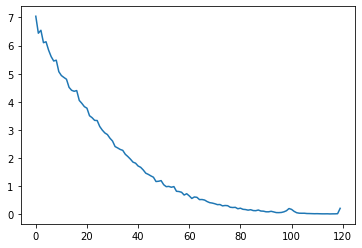

In [41]:
import matplotlib.pyplot as plt
plt.plot(train_loss)
plt.show()

In [45]:
def prediction(x):
    for idx in x:
      if idx == 0:
        break
      print(Urdu_vocab.idx2word[int(idx)],end=' ')
    
    print()

    x = x.long().reshape(1,-1).to(device)
    ans = translate(x)
    res = []
    for id in ans:
      res.append(English_vocab.idx2word[id])
    
    return res


In [49]:
def translate(input):
      #input = batch of english sentences[batch, sentece(padded)]
      with torch.no_grad():
        guess = []
        encoder_states, hidden, cell = model.encoder(input)
        # x = torch.ones((1)).float().to(device) # <START> token
        x = torch.ones((1)).long().to(device)
        while True:
          out, hidden, cell = model.decoder(x, hidden, cell, encoder_states) #out shape = [batch, vocab_size]
          x = out.argmax(1)# taking the word with max value(confidence)  shape = [batch of words]
          guess.append(int(x[0].detach().cpu()))

          if x == 2:
            break

      return guess

In [123]:
def get(sent):
  # sentence = sentence.lower()
  # sent = sentence.split()
  # sent.append('<END>')
  # print(sent)

  toks = []
  for word in sent:
    if Urdu_vocab.word2idx.get(word) is None:
      toks.append(Urdu_vocab.word2idx['the'])
    else:
      toks.append(Urdu_vocab.word2idx[word])
  # print(toks)
  sent = torch.tensor(toks).float()
  res = prediction(sent)
  # print(res)
  return res

In [51]:
tr_data =Val_data.values

In [156]:
get(tr_data[7266,0])[:-1]

متوجہ ہونا ۔ <END> 


KeyboardInterrupt: ignored

In [155]:
#For validation
list_refrences_train = []
list_hypothesis_train = []
for i in tqdm(range(int(tr_data.shape[0]/2))):
  if i!=8 and i!=719 and i!=1378 and i!=1783 and i!=4069 and i!=4917 and i!=6667 and i!=6737:
    print(i)
    list_hypothesis_train.append((get(tr_data[i,0])[:-1]))
    list_refrences_train.append(tr_data[i,0][:-1])

  0%|          | 0/7500 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
4764
مئی 1982 میں پوپ جان پال II نے ہوائی اڈے پر ایک بڑے پیمانے پر منعقد کیا تھا۔ <END> 
4765
پچھلے ہفتے اس کے ٹیلی ویژن اشتہارات منفی ہوگئے ، گہری مچھلی نے ماضی کے پوزینر عہدوں پر کام کیا۔ <END> 
4766
اسے "سپر گوشت لڑکا" کہا جاتا ہے۔ <END> 
4767
رینا کے ساتھ آخر میں اس معاہدے کو ختم کرنے کے قریب معلوم ہوتا ہے کہ ایسا لگتا ہے کہ مسکرانو اس کے پیچھے نہیں ہوگا۔ <END> 
4768
ادبی آدمی ۔ <END> 
4769
اس حادثے میں ایک 18 سالہ شخص ، جو پیدل چلنے والا بھی تھا ، قدرے زخمی ہوگیا۔ <END> 
4770
گھومنے پھرنے والا ۔ <END> 
4771
ان کے ہونٹوں پر ایک عجیب سی مسکراہٹ آگئی ۔ <END> 
4772
ریچرڈ ایک معمار تھا ، ایک ہمسایہ نے نئی جرسی کو اسٹار لیجر سے کہا ، اور سنتھیا نے ابھی ایم بی اے حاصل کیا تھا۔ <END> 
4773
کمیشن نے تکبر کے ساتھ اپنی حقائق پر مبنی مقابلہوں کو پیچھے چھوڑ دیا ہے اور یونین کے ممبروں کی سبسڈی اور برابری کے اصول کو دبا دیا ہے۔ <END> 
4774
2000 میں ، روسی افواج کے گروزن پر حملے کے دوران ، انسانی حقوق کی محافظ لڈا یوسوپووا ایک آدھے بگڑے ہوئے مکا

KeyboardInterrupt: ignored

In [158]:
len(list_refrences_train)

7258

In [159]:
#For validation


import nltk
from nltk.util import ngrams

print(f"bleu-1 : {nltk.translate.bleu_score.corpus_bleu(list_refrences_train, list_hypothesis_train, weights=(1.0,0.0,0.0,0.0))}")
print(f"bleu-2 : {nltk.translate.bleu_score.corpus_bleu(list_refrences_train, list_hypothesis_train, weights=(0.5,0.5,0.0))}")
print(f"bleu-3 : {nltk.translate.bleu_score.corpus_bleu(list_refrences_train, list_hypothesis_train, weights=(0.33,0.33,0.33,0.0))}")
print(f"bleu-4 : {nltk.translate.bleu_score.corpus_bleu(list_refrences_train, list_hypothesis_train, weights=(0.25,0.25,0.25,0.25))}")

/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


bleu-1 : 0.0015241701294742415
bleu-2 : 0.00016113377245895562
bleu-3 : 9.361960443578185e-105
bleu-4 : 1.8935008445234352e-156


In [160]:
print(f"Validation Blue Score : {nltk.translate.bleu_score.corpus_bleu(list_refrences_train, list_hypothesis_train)}")

Validation Blue Score : 1.8935008445234352e-156
